In [1]:
using EnvelopeApproximation
using EnvelopeApproximation.BubbleBasics
using EnvelopeApproximation.GeometricStressEnergyTensor
using Plots

# Setting up the bubbles

In [2]:
R = 2.
d = 2.4
bubbles = Bubbles([Bubble(Point3(0., 0., -d / 2) , R), Bubble(Point3(0., 0., d / 2), R)])
bubbles

Bubbles(Bubble[Bubble(Point3([0.0, 0.0, -1.2]), 2.0), Bubble(Point3([0.0, 0.0, 1.2]), 2.0)])

# Setting up the Ks

In [3]:
k_0 = 2π / (R + d / 2)
ks = LinRange(k_0 / 10, k_0 * 10, 1000)
k_vecs = (x -> Vec3(0., 0., x)).(ks)
norm(p:: Point3) = norm(coordinates(p), 2)

norm (generic function with 1 method)

In [4]:
k_0

1.9634954084936207

In [5]:
ks

1000-element LinRange{Float64, Int64}:
 0.19635, 0.215808, 0.235266, 0.254724, …, 19.5766, 19.596, 19.6155, 19.635

# Computing Analytically

comparing $$\tilde{(\partial_i\phi\partial_j\phi)}(k\hat{z})$$

For different i, j

In [6]:
ΔV = 1.
analytic_ii_integral = @. (4 * ΔV / (3 * ks)) * π * R^2 * sin(R * ks + d * ks / 2)

1000-element Vector{Float64}:
 50.15767486229104
 49.45531016706393
 48.69330137174879
 47.873402635005945
 46.99749779530277
 46.06759519057977
 45.0858221420004
 44.0544191183294
 42.97573359842899
 41.852213650250185
  ⋮
 -0.41096408773421805
 -0.3627860208598843
 -0.31329933707875657
 -0.26269815425219095
 -0.21118051461138443
 -0.15894761132980714
 -0.10620300445467072
 -0.05315182924662037
 -2.0900638705448165e-15

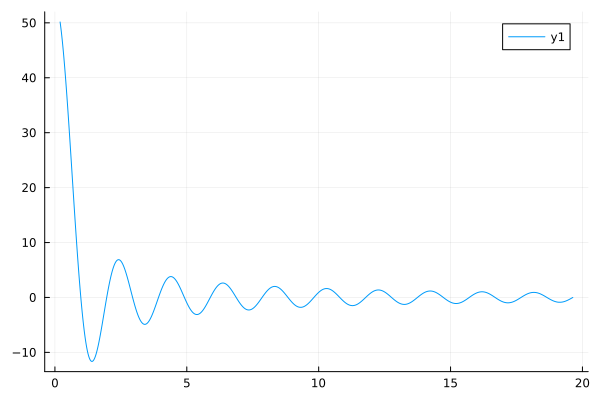

In [7]:
plot(ks, analytic_ii_integral)

# Computing Numerically

In [8]:
@time numerical_T = surface_integral(k_vecs, bubbles; ΔV=ΔV, rtol=1e-5)

  6.229892 seconds (19.72 M allocations: 922.057 MiB, 4.32% gc time, 78.29% compilation time)


1000×6 Matrix{ComplexF64}:
    19.0714+0.0im          0.0+0.0im  …  0.0+0.0im     12.0146+0.0im
    18.8782+0.0im          0.0+0.0im     0.0+0.0im     11.6984+0.0im
    18.6683+0.0im          0.0+0.0im     0.0+0.0im     11.3563+0.0im
    18.4418+0.0im          0.0+0.0im     0.0+0.0im     10.9893+0.0im
    18.1993+0.0im          0.0+0.0im     0.0+0.0im     10.5985+0.0im
    17.9411+0.0im          0.0+0.0im  …  0.0+0.0im      10.185+0.0im
    17.6677+0.0im          0.0+0.0im     0.0+0.0im     9.75013+0.0im
    17.3795+0.0im          0.0+0.0im     0.0+0.0im      9.2951-8.88178e-16im
     17.077+0.0im          0.0+0.0im     0.0+0.0im     8.82131+0.0im
    16.7608+0.0im          0.0+0.0im     0.0+0.0im     8.33016+0.0im
           ⋮                          ⋱                       ⋮
 -0.0329164-2.22045e-16im  0.0+0.0im     0.0+0.0im    -0.34514-5.55112e-17im
 -0.0334366-1.38778e-16im  0.0+0.0im     0.0+0.0im   -0.295922+1.94289e-16im
 -0.0338766-1.94289e-16im  0.0+0.0im     0.0+0.0im   -0.2

In [9]:
numerical_T

1000×6 Matrix{ComplexF64}:
    19.0714+0.0im          0.0+0.0im  …  0.0+0.0im     12.0146+0.0im
    18.8782+0.0im          0.0+0.0im     0.0+0.0im     11.6984+0.0im
    18.6683+0.0im          0.0+0.0im     0.0+0.0im     11.3563+0.0im
    18.4418+0.0im          0.0+0.0im     0.0+0.0im     10.9893+0.0im
    18.1993+0.0im          0.0+0.0im     0.0+0.0im     10.5985+0.0im
    17.9411+0.0im          0.0+0.0im  …  0.0+0.0im      10.185+0.0im
    17.6677+0.0im          0.0+0.0im     0.0+0.0im     9.75013+0.0im
    17.3795+0.0im          0.0+0.0im     0.0+0.0im      9.2951-8.88178e-16im
     17.077+0.0im          0.0+0.0im     0.0+0.0im     8.82131+0.0im
    16.7608+0.0im          0.0+0.0im     0.0+0.0im     8.33016+0.0im
           ⋮                          ⋱                       ⋮
 -0.0329164-2.22045e-16im  0.0+0.0im     0.0+0.0im    -0.34514-5.55112e-17im
 -0.0334366-1.38778e-16im  0.0+0.0im     0.0+0.0im   -0.295922+1.94289e-16im
 -0.0338766-1.94289e-16im  0.0+0.0im     0.0+0.0im   -0.2

In [10]:
numerical_ii_integral = @views (numerical_T[:, 1] + numerical_T[:, 4] + numerical_T[:, 6]) .|> real

1000-element Vector{Float64}:
 50.15728519464394
 49.45492049941683
 48.69291170410169
 47.87301296735886
 46.99710812765565
 46.067205522932674
 45.08543247435331
 44.0540294506823
 42.97534393078189
 41.85182398260307
  ⋮
 -0.4109728479552984
 -0.362794781080966
 -0.31330809729984227
 -0.26270691447328626
 -0.21118927483247102
 -0.15895637155089143
 -0.10621176467575935
 -0.053160589467709386
 -8.760221089407216e-6

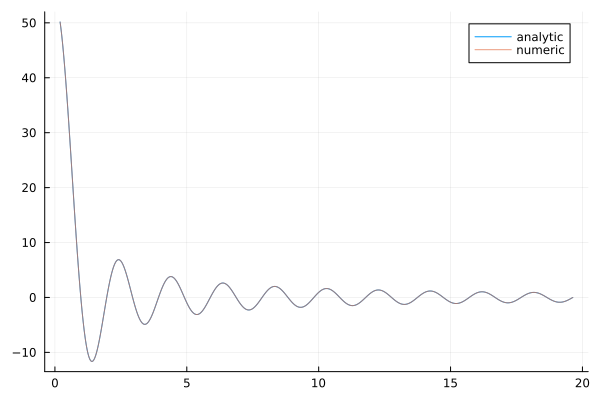

In [38]:
plot(ks, analytic_ii_integral, label="analytic")
plot!(ks, numerical_ii_integral, label="numeric", alpha=0.7)

# Comparing z, z component

In [39]:
ks

1000-element LinRange{Float64, Int64}:
 0.19635, 0.215808, 0.235266, 0.254724, …, 19.5766, 19.596, 19.6155, 19.635

In [40]:
analytic_zz_integral = @. 4π * ΔV / 3 / ks^3 * (d * ks + (2 * ks * R * cos(ks * R) - (2 - ks ^2 * R ^ 2) * sin(ks * R)) * cos(d * ks / 2) - (2 * ks * R * sin(ks * R) + (2 - ks ^ 2 * R ^ 2) * cos(ks * R)) * sin(ks * d / 2))

1000-element Vector{Float64}:
 12.014711412774016
 11.698567044742866
 11.356480931012376
 10.98947622903871
 10.598649887163068
 10.185169191970578
  9.750268096131444
  9.295243338677393
  8.8214503703372
  8.330299097183236
  ⋮
 -0.34513691933676965
 -0.2959183638802855
 -0.2455517119744028
 -0.19423404513063106
 -0.14216572596095114
 -0.08954961836159708
 -0.0365902995830059
  0.01650673275991794
  0.06953585566980396

In [41]:
numeric_zz_integral = numerical_T |> x -> x[:, 6] |> real

1000-element Vector{Float64}:
 12.014571134051414
 11.698426766020244
 11.356340652289786
 10.989335950316127
 10.598509608440455
 10.185028913247967
  9.750127817408854
  9.295103059954812
  8.821310091614631
  8.330158818460639
  ⋮
 -0.3451400730155774
 -0.29592151755909857
 -0.24555486565321438
 -0.1942371988094464
 -0.14216887963976443
 -0.08955277204041018
 -0.036593453261820806
  0.016503579081104634
  0.06953270199099218

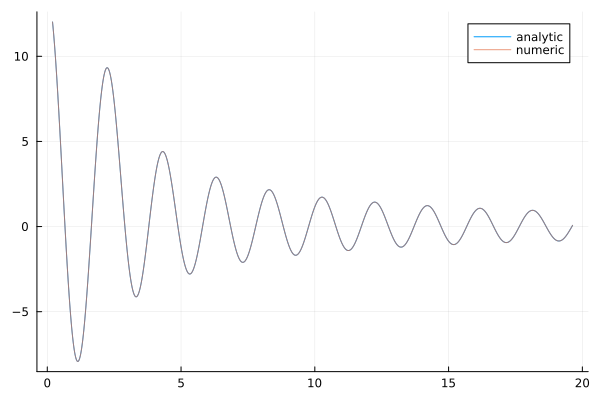

In [42]:
plot(ks, analytic_zz_integral, label="analytic")
plot!(ks, numeric_zz_integral, label="numeric", alpha=0.7)

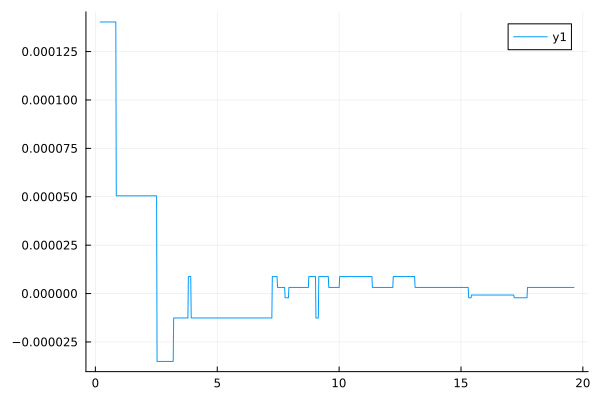

In [43]:
plot(ks, analytic_zz_integral - numeric_zz_integral)

# comparing xx integral

In [44]:
analytic_xx_integral = @. -2π * ΔV / (3 * ks ^ 3) * (d * ks + 2 * (ks * R * cos(ks * R) - sin(ks * R)) * cos(d * ks / 2) - 2 * (ks * R * sin(ks * R) + cos(ks * R)) * sin(d * ks / 2))

1000-element Vector{Float64}:
 19.071481724758524
 18.87837156116055
 18.66841022036821
 18.441963202983615
 18.199423954069854
 17.94121299930461
 17.667777022934473
 17.379587889826002
 17.077141614045892
 16.76095727653346
  ⋮
 -0.03291358419872146
 -0.03343382848979387
 -0.03387381255217544
 -0.034232054560779934
 -0.03450739432521368
 -0.03469899648410203
 -0.03480635243583091
 -0.034829281003267626
 -0.034767927834901506

In [45]:
numeric_xx_integral = numerical_T |> x -> x[:, 1] |> real

1000-element Vector{Float64}:
 19.071357030296262
 18.87824686669829
 18.66828552590595
 18.441838508521368
 18.1992992596076
 17.941088304842353
 17.66765232847223
 17.379463195363744
 17.077016919583627
 16.760832582071217
  ⋮
 -0.03291638746986052
 -0.033436631760933734
 -0.033876615823313944
 -0.03423485783191993
 -0.03451019759635329
 -0.03470179975524063
 -0.03480915570696927
 -0.03483208427440701
 -0.03477073110604079

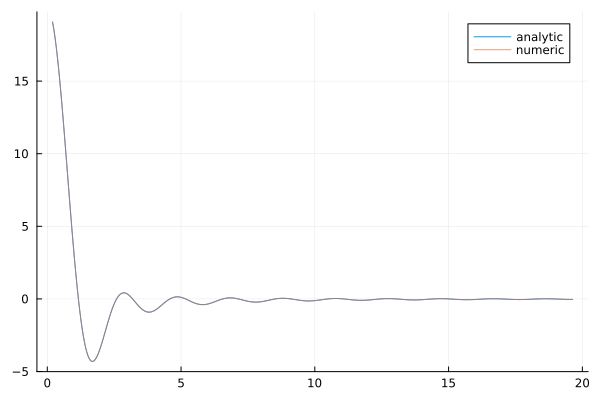

In [46]:
plot(ks, analytic_xx_integral, label="analytic")
plot!(ks, numeric_xx_integral, label="numeric", alpha=0.7)

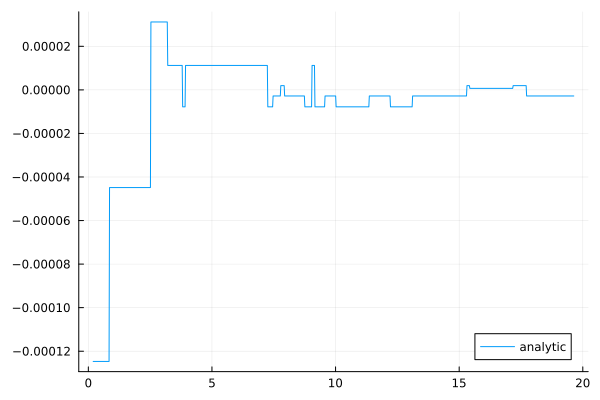

In [47]:
plot(ks, numeric_xx_integral - analytic_xx_integral, label="analytic")

# Comparing xx and yy

In [48]:
numeric_yy_integral = numerical_T |> x -> x[:, 4] |> real

1000-element Vector{Float64}:
 19.071357030296262
 18.87824686669829
 18.66828552590595
 18.441838508521368
 18.1992992596076
 17.941088304842353
 17.66765232847223
 17.379463195363744
 17.077016919583627
 16.760832582071217
  ⋮
 -0.03291638746986052
 -0.033436631760933734
 -0.033876615823313944
 -0.03423485783191993
 -0.03451019759635329
 -0.03470179975524063
 -0.03480915570696927
 -0.03483208427440701
 -0.03477073110604079

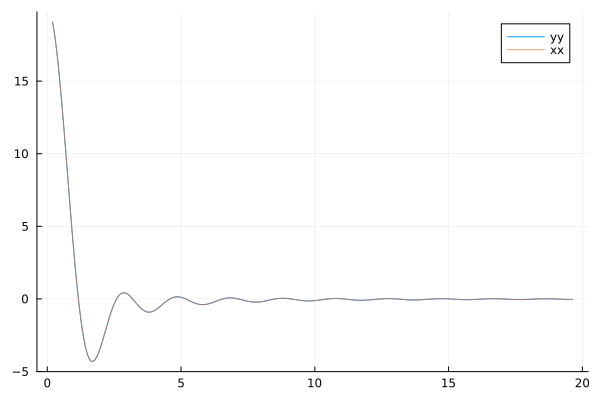

In [49]:
plot(ks, numeric_yy_integral, label="yy")
plot!(ks, numeric_xx_integral, label="xx", alpha=0.7)

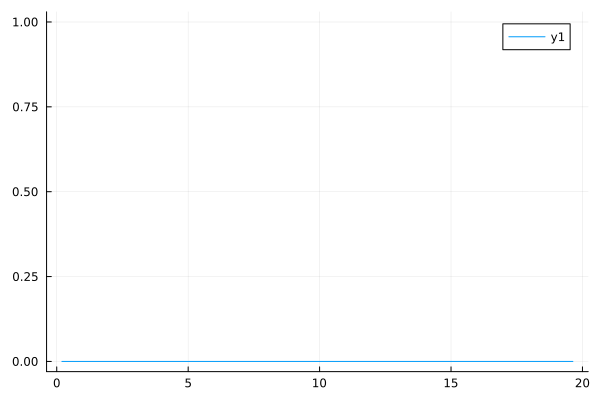

In [50]:
plot(ks, numeric_yy_integral - numeric_xx_integral)

# Volume Integration

## numerical computation

In [51]:
import EnvelopeApproximation.GeometricStressEnergyTensor: potential_integral
ΔV = 1.
numeric_integral = potential_integral(k_vecs, bubbles, ΔV=ΔV; rtol=1e-5) .|> real

1000-element Vector{Float64}:
 -57.214445174575275
 -56.63511468378137
 -56.00523066140436
 -55.32588960925058
 -54.59827186250931
 -53.82363899821358
 -53.00333106910318
 -52.13876366977774
 -51.23142484243739
 -50.282871829900145
   ⋮
   0.09874075259499351
   0.10030148546821072
   0.10162143765535528
   0.10269616368116884
   0.10352218297447029
   0.10409698945113532
   0.10441905730632198
   0.10448784300863204
   0.10430378350353352

## Analytical computation

In [52]:
function single_bubble_contribution(k)
    return (-ΔV) * 8 * π * cos(k * d / 2) * (sin(k * R) - (k * R) * cos(k * R)) / (k ^ 3)
end

single_bubble_contribution (generic function with 1 method)

In [53]:
function intersection_contribution(k)
    res = (π*d*k - 2*(π*R*k*cos(R*k) - π*sin(R*k))*cos(1/2*d*k) - 2*(π*R*k*sin(R*k) + π*cos(R*k))*sin(1/2*d*k))/k^3
    return 2 * (-ΔV) * real(res)
end

intersection_contribution (generic function with 1 method)

In [54]:
analytic_volume_integral = @. single_bubble_contribution(ks) - intersection_contribution(ks)

1000-element Vector{Float64}:
 -57.21444517427557
 -56.63511468348162
 -56.00523066110464
 -55.32588960895085
 -54.59827186220958
 -53.82363899791381
 -53.00333106880342
 -52.138763669477996
 -51.23142484213767
 -50.28287182960035
   ⋮
   0.0987407525961645
   0.10030148546938163
   0.10162143765652634
   0.10269616368233975
   0.10352218297564103
   0.10409698945230605
   0.10441905730749268
   0.1044878430098029
   0.10430378350470453

## Comparison

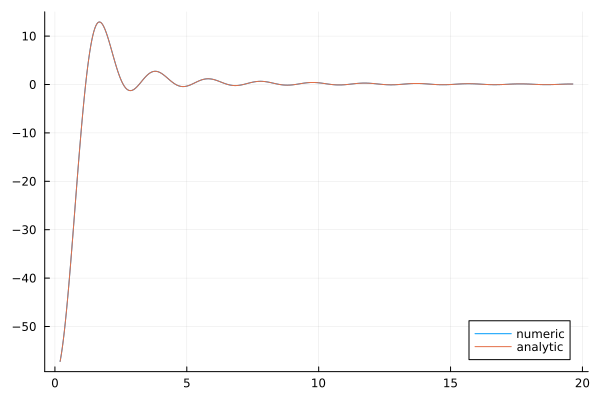

In [55]:
plot(ks, numeric_integral, label="numeric")
plot!(ks, analytic_volume_integral, label="analytic")

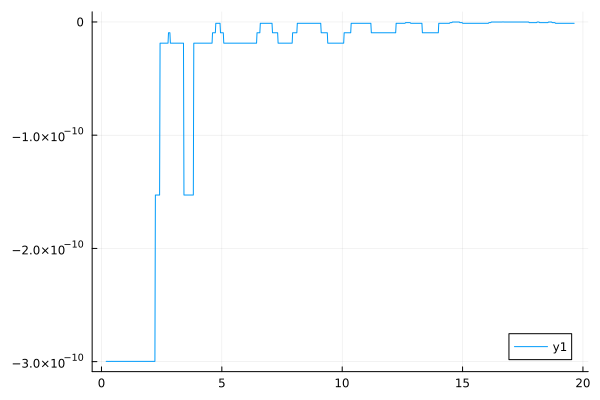

In [29]:
plot(ks, numeric_integral - analytic_volume_integral)

# Computing $T_{\mu\nu}$ and saving the data

In [30]:
numerical_T

1000×6 Matrix{ComplexF64}:
    19.0714+0.0im          0.0+0.0im  …  0.0+0.0im     12.0146+0.0im
    18.8782+0.0im          0.0+0.0im     0.0+0.0im     11.6984+0.0im
    18.6683+0.0im          0.0+0.0im     0.0+0.0im     11.3563+0.0im
    18.4418+0.0im          0.0+0.0im     0.0+0.0im     10.9893+0.0im
    18.1993+0.0im          0.0+0.0im     0.0+0.0im     10.5985+0.0im
    17.9411+0.0im          0.0+0.0im  …  0.0+0.0im      10.185+0.0im
    17.6677+0.0im          0.0+0.0im     0.0+0.0im     9.75013+0.0im
    17.3795+0.0im          0.0+0.0im     0.0+0.0im      9.2951-8.88178e-16im
     17.077+0.0im          0.0+0.0im     0.0+0.0im     8.82131+0.0im
    16.7608+0.0im          0.0+0.0im     0.0+0.0im     8.33016+0.0im
           ⋮                          ⋱                       ⋮
 -0.0329164-2.22045e-16im  0.0+0.0im     0.0+0.0im    -0.34514-5.55112e-17im
 -0.0334366-1.38778e-16im  0.0+0.0im     0.0+0.0im   -0.295922+1.94289e-16im
 -0.0338766-1.94289e-16im  0.0+0.0im     0.0+0.0im   -0.2

In [31]:
import EnvelopeApproximation.GeometricStressEnergyTensor: T_ij

In [32]:
numeric_xx_integral - numeric_integral

1000-element Vector{Float64}:
 76.28580220487154
 75.51336155047966
 74.67351618731031
 73.76772811777195
 72.7975711221169
 71.76472730305593
 70.67098339757541
 69.51822686514149
 68.30844176202102
 67.04370441197136
  ⋮
 -0.13165714006485402
 -0.13373811722914444
 -0.13549805347866922
 -0.13693102151308878
 -0.13803238057082357
 -0.13879878920637595
 -0.13922821301329125
 -0.13931992728303905
 -0.13907451460957432

In [33]:
numerical_Tij = Dict("T_xx" => numeric_xx_integral - numeric_integral, "T_yy" => numeric_yy_integral - numeric_integral, "T_zz" => numeric_zz_integral - numeric_integral)
analytic_Tij = Dict("T_xx" => analytic_xx_integral - analytic_volume_integral, 
                    "T_yy" => analytic_xx_integral - analytic_volume_integral, 
                    "T_zz" => analytic_zz_integral - analytic_volume_integral)

Dict{String, Vector{Float64}} with 3 entries:
  "T_zz" => [69.2292, 68.3337, 67.3617, 66.3154, 65.1969, 64.0088, 62.7536, 61.…
  "T_xx" => [76.2859, 75.5135, 74.6736, 73.7679, 72.7977, 71.7649, 70.6711, 69.…
  "T_yy" => [76.2859, 75.5135, 74.6736, 73.7679, 72.7977, 71.7649, 70.6711, 69.…

In [34]:
k_vecs .|> collect

1000-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.19634954084936207]
 [0.0, 0.0, 0.21580760345605562]
 [0.0, 0.0, 0.23526566606274915]
 [0.0, 0.0, 0.2547237286694427]
 [0.0, 0.0, 0.27418179127613623]
 [0.0, 0.0, 0.29363985388282976]
 [0.0, 0.0, 0.31309791648952334]
 [0.0, 0.0, 0.33255597909621687]
 [0.0, 0.0, 0.3520140417029104]
 [0.0, 0.0, 0.3714721043096039]
 ⋮
 [0.0, 0.0, 19.47928958408266]
 [0.0, 0.0, 19.498747646689356]
 [0.0, 0.0, 19.518205709296048]
 [0.0, 0.0, 19.53766377190274]
 [0.0, 0.0, 19.557121834509434]
 [0.0, 0.0, 19.576579897116126]
 [0.0, 0.0, 19.59603795972282]
 [0.0, 0.0, 19.615496022329516]
 [0.0, 0.0, 19.634954084936208]

In [35]:
complete_data = Dict("numerical_T" => numerical_Tij, 
                     "analytical_T" => analytic_Tij, 
                     "R" => R, 
                     "d" => d, 
                     "ΔV" => ΔV, 
                     "ks" => k_vecs .|> collect)

Dict{String, Any} with 6 entries:
  "ks"           => [[0.0, 0.0, 0.19635], [0.0, 0.0, 0.215808], [0.0, 0.0, 0.23…
  "analytical_T" => Dict("T_zz"=>[69.2292, 68.3337, 67.3617, 66.3154, 65.1969, …
  "numerical_T"  => Dict("T_zz"=>[69.229, 68.3335, 67.3616, 66.3152, 65.1968, 6…
  "R"            => 2.0
  "ΔV"           => 1.0
  "d"            => 2.4

In [36]:
using JSON
open("double_bubble_benchmark_data.json", "w") do f
    JSON.print(f, complete_data)
end